<a href="https://colab.research.google.com/github/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Oxford_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `scikit-learn` Tutorial
* This notebook covers different code implements from the scikit learn library, including:
  * Rescaling and Standardizing Data 
  * Model Evaluation and Metrics 
  * Classification and regression machine learning algorithms 
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We will use classification and regression datasets from `scikit-learn`, and will take code from the *ands-On Machine Learning with Scikit-Learn and TensorFlow* coursebook, as well as the [Machine Learning with Python Cookbook](https://www.amazon.co.uk/Machine-Learning-Python-Cookbook-Chris/dp/1491989386/ref=pd_sim_14_5?_encoding=UTF8&pd_rd_i=1491989386&pd_rd_r=e03d308c-dd3d-11e8-9244-bbcc5e42676d&pd_rd_w=lQiym&pd_rd_wg=lVZwd&pf_rd_i=desktop-dp-sims&pf_rd_m=A3P5ROKL5A1OLE&pf_rd_p=1e3b4162-429b-4ea8-80b8-75d978d3d89e&pf_rd_r=KBZG3157A75PS5MPGY8K&pf_rd_s=desktop-dp-sims&pf_rd_t=40701&psc=1&refRID=KBZG3157A75PS5MPGY8K).





### Approach and Exercises
* Note that this notebook is not focussed on how to structure an end to end machine learning problem, but is about extending the code implementations you will see in the end-to-end tutorials to further your knowledge.
* This notebook is a progression from the previous notebooks, meaning that the exercises will generally be more involved. We will provide code implementations for one of the datasets and leave space for you to code implementations on a different dataset. Support is available via Teams. 
* Each section will have an exercise to help reinforce your learning. We suggest you:
   * Write out each line of code by hand (rather than copy and paste it from the relevant example) - this will improve your understanding of code syntax
   * Write out, above each line of code, an explanation as to what the code, using a comment `#` - this will improve your understanding of how the code works


## 1. Tutorial set up 
* Import statements
* Loading the datasets
* Reviewing the ML problem

In [4]:
# import statements 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
 
import pandas as pd
import numpy as np
 
# Hide all warning messages
import warnings
warnings.filterwarnings('ignore')
 
# we will generally import scikit learn libraries when they are required, so you understand which specifc libraries are required

In [5]:
# load the classification dataset
class_data = load_breast_cancer()
class_X = pd.DataFrame(class_data.data, columns = class_data.feature_names)
class_y = class_data.target
 
# check the data has loaded successfully 
print(class_X.shape)
print(class_y.shape)

(569, 30)
(569,)


In [6]:
# load the regression dataset
boston = load_boston()
boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_y = boston.target
 
# check the data has loaded successfully 
print(boston_X.shape)
print(boston_y.shape)

(506, 13)
(506,)


In [7]:
print(boston_X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

## 2. Rescaling and Standardizing Data 
* Machine Learning algorithms can receive performance benefits from data that has been rescaled and standardized, either in terms of speed or accuracy, or both.
* There are a number of different ways of doing this, and implementations may vary because of algorithm requirements or personal preference.
* We cover two common implementations below, and an additional one in the exercise. We'd encourage further research to understand the maths in more detail.

In [8]:
## rescaling using MinMaxScaler, which converts data to a specified range, usually (0,1) or (-1,1)
# many machine learning algorithms assume data is on the same scale  
 
# here we import the necessary library 
from sklearn.preprocessing import MinMaxScaler
 
# Create feature - we will use one feature but you may just pass all the features to rescaler 
feature = class_X['texture error']
 
# print feature prior to rescaling
print("Features prior to rescaling:\n")
print(feature[0:10])
 
# we will print the shape out as well 
print("\nFeature shape prior to reshaping:")
print(feature.shape)

Features prior to rescaling:

0    0.9053
1    0.7339
2    0.7869
3    1.1560
4    0.7813
5    0.8902
6    0.7732
7    1.3770
8    1.0020
9    1.5990
Name: texture error, dtype: float64

Feature shape prior to reshaping:
(569,)


In [9]:
## because we have used a pandas column, our data has the wrong shape for the function
# we need a 2D tuple
 
# this will reshape the data 
feature = feature.values.reshape(-1,1)
 
# notice we now have a (samples,feature) tuple not just a (samples,) tuple
print("\nFeature shape after reshaping:")
feature.shape



Feature shape after reshaping:


(569, 1)

In [10]:
print(feature[0:10])

[[0.9053]
 [0.7339]
 [0.7869]
 [1.156 ]
 [0.7813]
 [0.8902]
 [0.7732]
 [1.377 ]
 [1.002 ]
 [1.599 ]]


In [11]:
# we need to instantiate the scaler and pass in the range we want our values to be scaled within 
minmax_scale = MinMaxScaler(feature_range=(0, 1))
 
# Scale the feature - note the fit_transform function, in the next example we will separate these steps
scaled_feature = minmax_scale.fit_transform(feature)
 
# lets look at the features now we have rescaled
print("Features after rescaling:\n")
scaled_feature[0:10]

Features after rescaling:



array([[0.12046941],
       [0.08258929],
       [0.09430251],
       [0.17587518],
       [0.09306489],
       [0.11713225],
       [0.09127475],
       [0.22471711],
       [0.14184052],
       [0.27378006]])

In [12]:
## standardizing rescales features so that they are normally distributed, with a mean of 0 and a std deviation of 1
 
# import the appropriate library
from sklearn.preprocessing import StandardScaler
 
# we will transform all the features in the dataset, so let's look at it  prior to transformation
mean_std = pd.DataFrame(data={'mean':class_X.mean(), 'std':class_X.std()})
 
# call the dataframe
mean_std[0:10]

,mean,std
mean radius,14.127292,3.524049
mean texture,19.289649,4.301036
mean perimeter,91.969033,24.298981
mean area,654.889104,351.914129
mean smoothness,0.096360,0.014064
mean compactness,0.104341,0.052813
mean concavity,0.088799,0.079720
mean concave points,0.048919,0.038803
mean symmetry,0.181162,0.027414
mean fractal dimension,0.062798,0.007060


In [13]:
# Create scaler
scaler = StandardScaler()
 
# fit the scaler - this calculates the minimum and maximum values of the data
scaler.fit(class_X)
 
# transform the data using the fitted scaler - this applies the transform using the fit
standardized = scaler.transform(class_X)
 
# this shows the features transformed - note that this returns an array not a dataframe
standardized[0:10]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [14]:
# lets have another look at our transformed data
mean_std_transformed = pd.DataFrame(data={'mean':standardized.mean(axis=0), 'std':standardized.std(axis=0)}, index=class_X.columns)
 
# call the dataframe
mean_std_transformed[0:10]

,mean,std
mean radius,-3.162867e-15,1.0
mean texture,-6.530609e-15,1.0
mean perimeter,-7.078891e-16,1.0
mean area,-8.799835e-16,1.0
mean smoothness,6.132177e-15,1.0
mean compactness,-1.120369e-15,1.0
mean concavity,-4.421380e-16,1.0
mean concave points,9.732500e-16,1.0
mean symmetry,-1.971670e-15,1.0
mean fractal dimension,-1.453631e-15,1.0


### EXERCISE SECTION 2: 
* Apply the `Rescaling` and `Standardization` functions to one or more features of the `Boston` dataset
* Research and implement a `Normalizer` function
* Have a think about what circumstances each of these functions might be most appropriate to apply to different data and why 
* We can discuss the implementations and benefits of each approach on Teams 

In [15]:
## EXERCISE CODE HERE
boston_X[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [16]:
## EXERCISE CODE HERE (continued) 
feature_age = boston_X['AGE']
feature_age[0:10]


0     65.2
1     78.9
2     61.1
3     45.8
4     54.2
5     58.7
6     66.6
7     96.1
8    100.0
9     85.9
Name: AGE, dtype: float64

In [17]:
## EXERCISE CODE HERE (continued)
feature_age = feature_age.values.reshape(-1,1)
feature_age[0:10]

array([[ 65.2],
       [ 78.9],
       [ 61.1],
       [ 45.8],
       [ 54.2],
       [ 58.7],
       [ 66.6],
       [ 96.1],
       [100. ],
       [ 85.9]])

In [18]:

## EXERCISE CODE HERE (continued)
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler(feature_range=(0,1))
scaled_feature_age = minmax_scale.fit_transform(feature_age)
scaled_feature_age[0:10]

array([[0.64160659],
       [0.78269825],
       [0.59938208],
       [0.44181256],
       [0.52832132],
       [0.57466529],
       [0.65602472],
       [0.95983522],
       [1.        ],
       [0.85478888]])

In [19]:
## EXERCISE CODE HERE (continued)
mean_std = pd.DataFrame(data={'mean':boston_X.mean(), 'std':boston_X.std()})
mean_std[0:10]



,mean,std
CRIM,3.613524,8.601545
ZN,11.363636,23.322453
INDUS,11.136779,6.860353
CHAS,0.069170,0.253994
NOX,0.554695,0.115878
RM,6.284634,0.702617
AGE,68.574901,28.148861
DIS,3.795043,2.105710
RAD,9.549407,8.707259
TAX,408.237154,168.537116


In [20]:
## EXERCISE CODE HERE (continued)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(boston_X)
standardised = scaler.transform(boston_X)
standardised[0:10]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148],
       [-0.41704368, -0.487722

In [21]:
## EXERCISE CODE HERE (continued)
mean_std_transformed = pd.DataFrame(data={'mean':standardised.mean(axis=0), 'std':standardised.std(axis=0)}, index=boston_X.columns)
mean_std_transformed[0:10]

,mean,std
CRIM,-8.787437e-17,1.0
ZN,-6.343191e-16,1.0
INDUS,-2.682911e-15,1.0
CHAS,4.701992e-16,1.0
NOX,2.490322e-15,1.0
RM,-1.145230e-14,1.0
AGE,-1.407855e-15,1.0
DIS,9.210902e-16,1.0
RAD,5.441409e-16,1.0
TAX,-8.868619e-16,1.0


In [22]:

## EXERCISE CODE HERE (continued)
from sklearn import preprocessing
normalized_X = preprocessing.normalize(boston_X)
normalized_X[0:10]

array([[1.26388341e-05, 3.59966795e-02, 4.61957387e-03, 0.00000000e+00,
        1.07590075e-03, 1.31487871e-02, 1.30387972e-01, 8.17924550e-03,
        1.99981553e-03, 5.91945396e-01, 3.05971776e-02, 7.93726783e-01,
        9.95908132e-03],
       [5.78529889e-05, 0.00000000e+00, 1.49769546e-02, 0.00000000e+00,
        9.93520754e-04, 1.36021253e-02, 1.67140272e-01, 1.05222110e-02,
        4.23676228e-03, 5.12648235e-01, 3.77071843e-02, 8.40785474e-01,
        1.93620036e-02],
       [5.85729947e-05, 0.00000000e+00, 1.51744622e-02, 0.00000000e+00,
        1.00662274e-03, 1.54212886e-02, 1.31139977e-01, 1.06609718e-02,
        4.29263427e-03, 5.19408747e-01, 3.82044450e-02, 8.43137761e-01,
        8.64965806e-03],
       [7.10489715e-05, 0.00000000e+00, 4.78488594e-03, 0.00000000e+00,
        1.00526503e-03, 1.53599229e-02, 1.00526503e-01, 1.33059337e-02,
        6.58470542e-03, 4.87268201e-01, 4.10446638e-02, 8.66174100e-01,
        6.45301131e-03],
       [1.50596596e-04, 0.00000000e+

## 3. Model Evaluation and Metrics 
* We need to understand how we are going to assess our model's performance. This involves:
  * Splitting our Training and Testing data appropriately 
  * Choosing an Evaluation Metric
  * Developing a Baseline Model 


In [23]:
## testing and training splits 
 
# import statement 
from sklearn.model_selection import train_test_split
 
# this splits our data into a test and training set
# the function shuffles our data before splitting (so we will get both classes in both sets)
# setting a random_state means that this shuffling will be consistent for each run 
# setting stratify=class_y tells the function to have an even number of class labels in each set
X_train, X_test, y_train, y_test = train_test_split(class_X, class_y, test_size=0.3, random_state=1, stratify = class_y)

In [24]:
# we can verify the stratifications using np.bincount
print('Labels counts in y:', np.bincount(class_y))
print('Percentage of class zeroes in class_y',np.round(np.bincount(class_y)[0]/len(class_y)*100))
 
print("\n")
print('Labels counts in y_train:', np.bincount(y_train))
print('Percentage of class zeroes in y_train',np.round(np.bincount(y_train)[0]/len(y_train)*100))
 
print("\n")
print('Labels counts in y_test:', np.bincount(y_test))
print('Percentage of class zeroes in y_test',np.round(np.bincount(y_test)[0]/len(y_test)*100))

Labels counts in y: [212 357]
Percentage of class zeroes in class_y 37.0


Labels counts in y_train: [148 250]
Percentage of class zeroes in y_train 37.0


Labels counts in y_test: [ 64 107]
Percentage of class zeroes in y_test 37.0


* Note that there are additional ways to divide our data into test and training sets, and we cover `K-fold cross validation` in the **Pipeline** section below.

In [25]:
## we can create a baseline model to benchmark our other estimators against
## this can be a simple estimator or we can use a dummy estimator to make predictions in a random manner 
 
# this is the required import statement 
from sklearn.dummy import DummyClassifier
 
# this creates our dummy classifier, and the value we pass in to the strategy parameter determines how the 
# classifier will make the predictions
dummy = DummyClassifier(strategy='uniform', random_state=1)
 
# "Train" model
dummy.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [26]:
## evaluating the model metrics
 
# Here we get an accuracy score
dummy.score(X_test, y_test)

0.47953216374269003

* There are a number of different ways in `scikit-learn` to get an estimator score and it can get confusing first.
* Remember that to get a score, we need to instantiate a model, fit it to the data, predict using unseen data, compare the predictions against actual data, and score the difference. This is true for classification and regression problems, and is true no matter the method used to get there.
  * So, in the end-to-end tutorials we split the training and test data,  fitted our data to an estimator, and called the `.predict` method on the estimator to get our predictions, and then passed this to a scoring function (four steps)
  * In using the `estimator.score()`method above, we are passing in our split data and the method is then making predictions and returning the score (three steps). 
  * And, in the `cross_val_score()` method used below we are effectively using one step as the method takes an estimator and our data and returns a score. You can find out more about this method [here](https://scikit-learn.org/stable/modules/cross_validation.html) 
  * Another function cross validation function `cross_validate()` is available
  and enables the user to specify multiple scoring metrics at once.

In [27]:
## here we fit a new estimator and use cross_val_score to get a score based on a defined metric 
 
# import statements
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
 
# instantiate logistic regression classifier
logistic = LogisticRegression(solver='liblinear')
 
# we pass our estimator and data to the method. we also specify the number of folds (default is 3)
# the default scring method is the one associated with the estimator we pass in
# we can use the scoring parameter to pass in different scoring methods. Here we use recall.  
cross_val_score(logistic, class_X, class_y, cv=5, scoring="recall")

array([0.98591549, 0.97183099, 0.98611111, 0.95833333, 0.95774648])

### EXERCISE SECTION 3:
* Part 1: Implement binary classification scoring functions 
  * Use `cross_val_score` to implement `f1`, and `precision` scores 
  * Understand what these scores, and the `accuracy` and `recall` scores implemented above, tell us
* Part 2: Another way of assessing our model's performance is with the `Receiving Operating Characteristic (ROC) Curve`. 
  * What does this show us? Can you implement it?
  * Like the other questions here, we can work through these via Teams.
* Part 3: What are the main ways of evaluating a mutliclass classification problem?
  * Research and make notes below
* Part 4: Apply the above approach to the Boston dataset. You should think about:
  * What sort of test and training split you want to implement 
    * Be careful to change the variable names for `X_train`, `y_train` etc. so that the new dataset doesn't overwrite those variables
    * Experiment with not using the `stratify =  ` variable
  * The evaluation metrics you wish to use and why (this is different than above as the Boston dataset is a regression problem)
    * Evaluation metrics are covered in *Python Machine Learning*, Chapter 6
  * Implementing a baseline model 
    * *Python Machine Learning*, Chapter 10 has linear regression implementations to draw from.
* Feel free to discuss your approach on Teams and ask for support 

In [28]:
## EXERCISE SECTION 3: PART 1
## use the cross_val_score function to pass in and return the scoring functions: precision, f1 
## note the scores and research what each score represents 
number_of_folds = 5
precision = cross_val_score(logistic, class_X, class_y, cv=number_of_folds, scoring='precision')
recall = cross_val_score(logistic, class_X, class_y, cv=number_of_folds, scoring='recall')
f1 = cross_val_score(logistic, class_X, class_y, cv=number_of_folds, scoring='f1')
accuracy = cross_val_score(logistic, class_X, class_y, cv=number_of_folds, scoring='accuracy')
print(f"Precision = {precision} \n   Recall = {recall} \n       F1 = {f1} \n Accuracy = {accuracy}")

Precision = [0.90909091 0.93243243 0.97260274 0.95833333 0.98550725] 
   Recall = [0.98591549 0.97183099 0.98611111 0.95833333 0.95774648] 
       F1 = [0.94594595 0.95172414 0.97931034 0.95833333 0.97142857] 
 Accuracy = [0.92982456 0.93859649 0.97368421 0.94736842 0.96460177]


In [29]:
## EXERCISE SECTION 3: PART 2
## look up and implement the ROC metric 

# ROC - Receiver Operating Chracteristic
from sklearn import metrics
clf = logistic.fit(class_X, class_y)
y_scores = clf.predict_proba(class_X)[:, 1]
metrics.roc_auc_score(class_y, y_scores)


0.9947412927435125

In [30]:
## EXERCISE CODE HERE (continued)
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(class_y, y_scores)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for breast cancer classifier")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot(false_positive_rate, true_positive_rate, color="blue")
plt.show()

<Figure size 640x480 with 1 Axes>

**EXERCISE SECTION 3: PART 3**
* What are the evaluation metrics that can be used for mutliclass regression problems?


---

**Answer**
* The accuracy metric compares the predicted values with the labelled values and shows the probability of a successful prediction.
* The confusion matrix shows in more detail the number of correctly predicted values (True positives (TP) and True negatives (TN)) and
incorrectly predicted values (False Positives (FP) and False Negatives (FN)). 
* Precision is the proportion of True Positives out of the predicted Positives: (TP/(TP+FP))
* Recalls is the proportion of True Positives out of the predicted Negatives: (TP/(TP+FN))
* F1 is the most commonly used metric: 2* (Precision * Recall)/ (Precision + Recall)
* This compares with accuracy: (TP + TN) / (TP+FP+TN+FN)
* F1 is preferred. The disadvantage with accuracy is that often there are class imbalances that make it easier to make correct predictions - and therefore high accuracy - with an inaccurate model.


In [31]:
## EXERCISE SECTION 3: PART 4 
## Implement a baseline model and evaluation metric for the Boston dataset (regression)

# The selected feature is Percentage of lower status of the population (LSTAT)
boston_key = "LSTAT"
feature_lower_status = boston_X[boston_key]
print("Median values prior to scaling")
print(feature_lower_status[0:10])

print(f"Labels (house prices): {boston_y[0:10]}")


Median values prior to scaling
0     4.98
1     9.14
2     4.03
3     2.94
4     5.33
5     5.21
6    12.43
7    19.15
8    29.93
9    17.10
Name: LSTAT, dtype: float64
Labels (house prices): [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [32]:
## EXERCISE CODE HERE (continued)
print("\nBoston Feature shape prior to reshaping")
print(feature_lower_status.shape)
print("\nAnd after reshaping")
feature_lower_status = feature_lower_status.values.reshape(-1, 1)
print(feature_lower_status.shape)
print(boston_y.shape)


Boston Feature shape prior to reshaping
(506,)

And after reshaping
(506, 1)
(506,)


In [33]:
## EXERCISE CODE HERE (continued)
def get_metrics(Y_test, Y_pred, title):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)

    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title(title + " Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    plt.close()

Mean squared error:  38.09870218243469
Mean absolute error:  4.752100511437846
R^2 :  0.4886979007906853


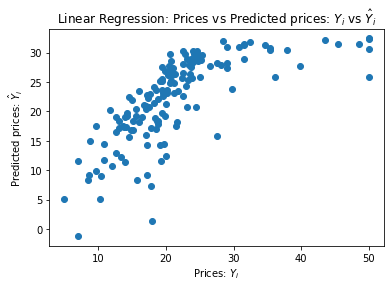

In [34]:
## EXERCISE CODE HERE (continued)
from sklearn.linear_model import LinearRegression
# Linear regression is the baseline model

X_btrain, X_btest, y_btrain, y_btest = train_test_split(feature_lower_status,boston_y, test_size=0.3, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_btrain, y_btrain)
Y_pred = linear_reg.predict(X_btest)
title = "Linear Regression:"
get_metrics(y_btest, Y_pred, title)

## 4. Classification and regression machine learning algorithms 

### EXERCISE SECTION 4:
* You already have an idea about how to fit and instatiate machine learning models.
* There are a large number of machine learning approaches you can use, and this exercise is about understanding how a number of them perform on our datasets.
* Research and instantiate as many algorithms as you wish in the code cell marked below. 
  * There are a number of examples in *Python Machine Learning*, for example `SVM`, `Decision Trees` and `Logistic Regression` in Chapter 3.

Mean squared error:  31.03193827928363
Mean absolute error:  3.9141744029388255
R^2 :  0.5835371213235997


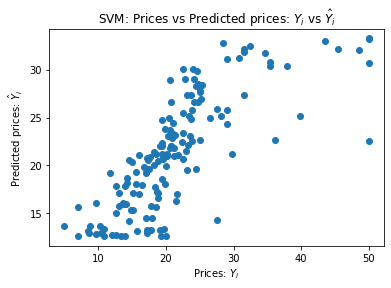

In [35]:
## EXERCISE CODE HERE 
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_btrain, y_btrain)
Y_pred = svr_reg.predict(X_btest)
title = "SVM:"
get_metrics(y_btest, Y_pred, title)

Mean squared error:  47.37496710526316
Mean absolute error:  4.854605263157895
R^2 :  0.3642061607531293


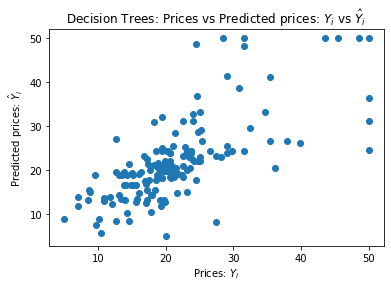

In [36]:
## EXERCISE CODE HERE (continued)
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_btrain, y_btrain)
Y_pred = dt_reg.predict(X_btest)
title = "Decision Trees:"
get_metrics(y_btest, Y_pred, title)

Mean squared error:  39.6022773107762
Mean absolute error:  4.522122086466167
R^2 :  0.46851923129799145


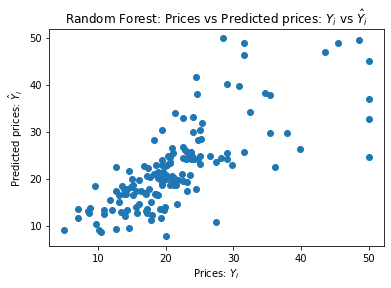

In [37]:
## EXERCISE CODE HERE (continued)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_btrain, y_btrain)
Y_pred = rf_reg.predict(X_btest)
title = "Random Forest:"
get_metrics(y_btest, Y_pred, title)

In [38]:
## EXERCISE CODE HERE (continued)
# Logistic Regression is actually a classifier
# So this code does not work because the labels are house prices
# which are continuous values rather than categories

#from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression(random_state=42)
#log_reg.fit(X_btrain, y_btrain)
#Y_pred = log_reg.predict(X_btest)
#title = "Logistic Regression:"
#get_metrics(y_btest, Y_pred, title)



## 5. Regularization 
* When we train our models, we might need to prevent against **over-** or **underfitting**. Overfitting is when our model performs well on the training data but does not generalise to unseen data (such as our test set). The model might be too complex, with the parameter weights probably too large and aligned too closely to the patterns of the training data. The solution is to develop a means of reducing these weights during training, and this is done through a process called **regularization**.
* Underfitting is when our model is too simple to capture patterns in either the training or test sets. Chapters 3 and 10 of *Python Machine Learning* cover this topic in more detail.
* How we regularise the model depends on what estimator we are using. In most cases, we can penalise the increase in parameter weights as the model trains by inserting a regularization term to our model when we instantiate it. This is applicable to regression models, logistic regression and support vector classifiers (see below for implementations).  
* For these estimators, the regularization term is commonly either **L1 Regularization**, where the weights are reduced by a user defined parameter multiplied by the absolute value of the weights (or coefficients); or **L2 Regularization**, where the weights are reduced by a user defined parameter multiplied by the squared sum of the weights.
* For tree based models, such as Decision Trees and Random Forests, we can help prevent overfitting by adjusting parameters associated with the leaf and branch settings.
* Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales.
* We implement L1 and L2 Regularization for regression models in this section. In Section 6, we implement  `RandomSearchCV` (explained below) on a `Logistic Regression` estimator. The parameters that we change in that implementation are related to regularization ('`C`' and '`penalty`').

In [39]:
## For regularization in regression we instantiate new models
## Lasso regression is used for L1 Regularization 
 
# import statement 
from sklearn.linear_model import Lasso
 
# Create lasso regression with alpha value - this is our hyperparameter 
regression = Lasso(alpha=0.5)
 
# Fit the linear regression
model_l1 = regression.fit(class_X, class_y)

In [40]:
## Ridge regression is used for L2 Regularization
 
# import statement 
from sklearn.linear_model import Ridge
 
# Create ridge regression with an alpha value (our hyperparameter)
regression = Ridge(alpha=0.5)
 
# Fit the linear regression
model_l2 = regression.fit(class_X, class_y)

### EXERCISE FOR SECTION 5
* Part 1: Train both the models above and get a score. Compare the results and see if one type of regularization works better than another.
* Part 2: The `ElasticNet`estimator combines both L1 and L2 Regularization. Look up the estimator on the scikit-learn documentation and a) write out how it combines both regularization methods, and b) see if you can implement it.
* Part 3: We can use `RidgeCV` and `LassoCV` to explore the best regularization parameters for each estimator. Implement one or both of these estimators, defining the parameters you want to search over.
* Part 4: Look at the `DecisionTreeClassifier `documentation in `scikit-learn` and come to a view on which parameters can be set to help prevent overfitting (and therefore help regularization). 

In [75]:
## EXERCISE SECTION 5: PART 1 
model_score = lambda model, x, y: round(model.score(x, y), 3)
print(f"L1 score: {model_score(model_l1, X_test, y_test)}")
print(f"\nL2 score: {model_score(model_l2, X_test, y_test)}")

# L2 gives the best score, by 10%

L1 score: 0.663

L2 score: 0.764


In [76]:
## EXERCISE SECTION 5: PART 2 
# ElasticNet combines the properties of both Ridge (L2) and Lasso (L1) regression. It works by penalizing the model by combining L1 and L2.
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha=0.5)
model_enet.fit(class_X, class_y)
print(f"Elastic Net score: {model_score(model_enet, X_test, y_test)}")

Elastic Net score: 0.69


In [77]:
## EXERCISE SECTION 5: PART 3

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
alphas_ = [0.5, 0.1, 0.01]
model_lcv = LassoCV(alphas=alphas_)
model_lcv.fit(class_X, class_y)
print(f"L1 CV score: {model_score(model_lcv, X_test, y_test)}")
model_rcv = RidgeCV(alphas=alphas_)
model_rcv.fit(class_X, class_y)
print(f"L2 CV score: {model_score(model_rcv, X_test, y_test)}")

L1 CV score: 0.712
L2 CV score: 0.779


#### EXERCISE SECTION 5: PART 4
* Answer here
* It is not recommended to use L1 or L2 regularisers for Decision Tree Classifiers as it is a heuristic algorithm
* Instead a better approach is to;
* 1. Limit max depth of trees
* 2. Bag more than 1 tree
* 3. Set a stricter stopping criteria on when to split a node further
* Alternatively use a Random Forest classifier instead

 ## 6. Optimizing parameters 
 * We applied `GridSearchCV` to identify the best hyperparameters for our models in the in-class regression tutorials.
 * There are other methods available to use that don't take the brute force approach of `GridSearchCV`.
 * We will cover an implementation of `RandomizedSearchCV` below, and use the exercise for you to implement it on the other datatset.
  * We use this method to search over defined hyperparameters, like `GridSearchCV`, however a fixed number of parameters are sampled, as defined by `n_iter` parameter.  
  

In [44]:
# import libraries - note we use scipy for generating a uniform distribution 
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
 
# Create logistic regression
logistic = LogisticRegression(solver='liblinear')
 
# we can create hyperparameters as a list, as in a type regularisation penalty 
penalty = ['l1', 'l2']
 
# or as a distribution of values to sample from -'C' is the hyperparameter controlling the size of the regularisation penalty 
C = uniform(loc=0, scale=4)
 
# we need to pass these parameters as a dictionary of {param_name: values}
hyperparameters = dict(C=C, penalty=penalty)
 
# we instantiate our model
randomizedsearch = RandomizedSearchCV(
    logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
    n_jobs=-1)
 
# and fit it to the data 
best_model = randomizedsearch.fit(class_X, class_y)

In [45]:
# and we can call this method to return the best parameters the search returned
best_model.best_estimator_

LogisticRegression(C=3.2519798815438947, solver='liblinear')

### EXERCISE FOR SECTION 6: 
* Part 1: Once we have fit the model to our data, we can call different methods on it, for example we can find out what the best parameters were, and we can predict using the best estimator returned by the search. Use the docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to call these methods on the `best_model` variable above. 
* Part 2: Implement `RandomSearchCV` on the Boston dataset
  * Think about which parameters you want to specify
  * You can pass these parameters to variables prior to creating the random search (as we do above)
  * Then call methods as we do for Part 1.

In [46]:
## EXERCISE SECTION 6: PART 1 
print(f"Best parameters:{best_model.best_params_} and score: {best_model.best_score_}")  



Best parameters:{'C': 3.2519798815438947, 'penalty': 'l2'} and score: 0.956078248719143


In [47]:
svr_reg= SVR()
svr_reg.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [48]:
## EXERCISE SECTION 6: PART 2
svr_reg = SVR()
# we can create hyperparameters as a list, as in a type regularisation penalty 
#penalty = ['l1', 'l2']
 
# or as a distribution of values to sample from -'C' is the hyperparameter controlling the size of the regularisation penalty 
C = np.arange(0,20,1)
#kernal = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [0.5, 0.1, 0.01, 0.001, 0.0001]
 
# we need to pass these parameters as a dictionary of {param_name: values}
hyperparameters = dict(C=C, gamma=gamma)
 
# we instantiate our model
randomizedsearch = RandomizedSearchCV(
    svr_reg, hyperparameters, random_state=42, n_iter=100, cv=5, verbose=0,
    n_jobs=-1)
 
# and fit it to the data 
best_model = randomizedsearch.fit(X_btrain, y_btrain)
print(f"Best parameters:{best_model.best_params_} and score: {best_model.best_score_}")  

Best parameters:{'gamma': 0.01, 'C': 16} and score: 0.6535101117147949


## 7. Ensemble models 

* The goal of ensemble methods is to combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone. 
* There are several different approaches to achieve this, including **majority voting** ensemble methods, with which we select the class label that has been predicted by the majority of classifiers.
* The ensemble can be built from different classification algorithms, such as decision trees, support vector machines, logistic regression classifiers, and so on. Alternatively, we can also use the same base classification algorithm, fitting different subsets of the training set. 
* Indeed, majority voting will work best if the classifiers used are different from each other and/or trained on different datasets (or subsets of the same data) in order for their errors to be uncorrelated.  Chapter 7 of *Python Machine Learning* has a good discussion of the principles behind Ensemble models. 

In [49]:
# import our classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
 
# lets instantiate individual models 
log_clf = LogisticRegression(solver='liblinear')
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
 
# and an ensemble of them
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              # here we select hard voting, which returns the majority of the predictions, not an average of probabilities
                              voting='hard')

In [50]:
# here we can cycle through the individual estimators 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    # fit them to the training data 
    clf.fit(X_train, y_train)
    
    # get a prediction
    y_pred = clf.predict(X_test)
    
    # and print the prediction 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9473684210526315
RandomForestClassifier 0.9473684210526315
SVC 0.9239766081871345
VotingClassifier 0.9532163742690059


### EXERCISE FOR SECTION 7: 
* Part 1: Implement **soft voting**.
 * If all the classifiers used in the ensemble are able to estimate class probabilities (they have a `predict_proba()` method that can be called on the estimator), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. 
 *  Replace `voting="hard"` with `voting="soft"` and ensure that all your classifiers can estimate class probabilities. 
  * If you use the SVC estimator, you need to set `probability = True`, which will make the SVC class use cross-validation to estimate class probabilities and add a predict_proba() method. 

* Part 2: Implement Ensemble Learning on the Boston Dataset.


In [51]:
## EXERCISE SECTION 7: PART 1 
log_clf_ = LogisticRegression(solver='liblinear')
rnd_clf_ = RandomForestClassifier()
svm_clf_ = SVC(probability=True)
soft_voting_clf = VotingClassifier(estimators=[('lr', log_clf_), ('rf', rnd_clf_), ('svc', svm_clf_)], voting='soft')
for clf in (log_clf, rnd_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
# Logistic Regression and SVC give the same results. There are small variations for the RandomForestClassifier and the VotingClassifier 

LogisticRegression 0.9473684210526315
RandomForestClassifier 0.9532163742690059
SVC 0.9239766081871345
VotingClassifier 0.9473684210526315


------------------------------------
SVR
Mean squared error:  31.03193827928363
Mean absolute error:  3.9141744029388255
R^2 :  0.5835371213235997


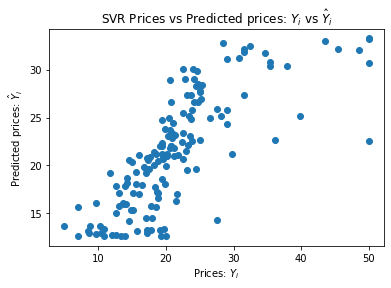

------------------------------------
LinearRegression
Mean squared error:  38.09870218243469
Mean absolute error:  4.752100511437846
R^2 :  0.4886979007906853


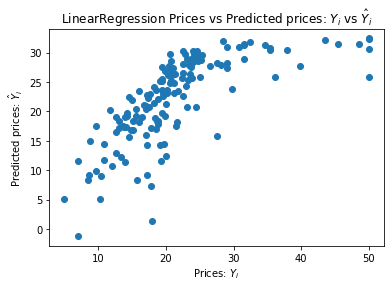

------------------------------------
RandomForestRegressor
Mean squared error:  38.864310387668134
Mean absolute error:  4.503637883771931
R^2 :  0.4784230866872219


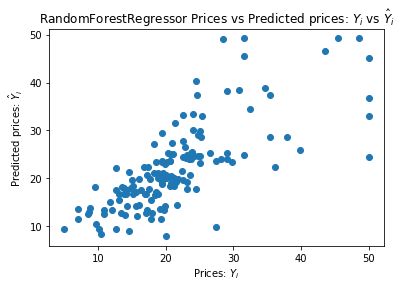

------------------------------------
VotingRegressor
Mean squared error:  30.03745307414459
Mean absolute error:  4.121351009588223
R^2 :  0.5968835699922536


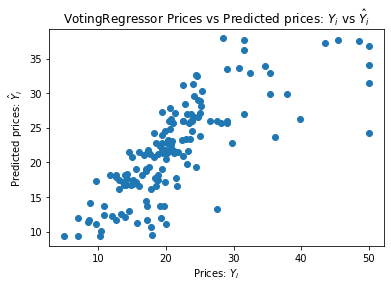

In [52]:
## EXERCISE SECTION 7: PART 2 

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
lr_reg_ = LinearRegression()
number_of_trees_in_the_forest = 100
rf_reg_ = RandomForestRegressor(n_estimators=number_of_trees_in_the_forest, random_state=42)
svr_reg_ = SVR()

voting_reg = VotingRegressor(estimators=[('lr', lr_reg_), ('rf', rf_reg_), ('svr', svr_reg_)])
for reg in (svr_reg_, lr_reg_, rf_reg_, voting_reg):
    title = reg.__class__.__name__
    print("------------------------------------\n" + title)
    reg.fit(X_btrain, y_btrain)
    y_pred = reg.predict(X_btest)
    get_metrics(y_btest, y_pred, title)
    
# The VotingRegressor gets the best results and is slightly better than SVR

## 8. Building Pipelines
* We can build a pipeline so that many of the steps we have covered to now can be implemented in one step, and be applied to the training and testing set without repeating code.
* We will cover one implementation of a pipeline. The exercise below will link to further information for you to be able implement your own pipelines.

In [53]:
# import the libraries - these are dependent on what we wish to implement in our pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# this is the pipeline class required to implement all pipelines
from sklearn.pipeline import make_pipeline

In [54]:
# here we instantiate the pipeline with our methods
pipe_lr = make_pipeline(StandardScaler(),                    # takes an arbitary number of transfomers
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))  # but ends with an estimator

In [55]:
# here we fit our pipeline to the data, so that the steps above are executed on the training set
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [56]:
# here we call the predict method on our pipeline model against the test set 
y_pred = pipe_lr.predict(X_test)

In [57]:
# and print out the result
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.947


### EXERCISE FOR SECTION 8: 
* Implement a pipeline on the classification dataset (the one used in the example above). Specifically, implement `K-Fold Cross Validation` as set out in  *Python Machine Learning*, Chapter 6.
  Moreinformation on pipelines is available at this [link](https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html) blog series 
* Think about:
  * the code being implemented for `K-Fold Cross Validation` as part of the pipeline. Put comments above the code to explain what is happening. 
  * how you want to preprocess the data
  * whether you want to think about reducing the dimensions of the data with something like `Principal Component Analysis` and why
  * what algorithm you want to use 
  * make sure to predict the data

In [78]:
## EXERCISE CODE HERE
rnd3 = lambda input : round(input, 3)
mean_score = lambda scores : rnd3(np.mean(scores))
std_score = lambda scores : rnd3(np.std(scores))
distribution = lambda y_train : np.bincount(y_train)

from sklearn.model_selection import StratifiedKFold
# Use StratifiedKFold to ensure equal distribution of classes in the train/test split
# KFold separate a new section of the dataset for testing for each fold. 
# The previous test selction returns to train dataset
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
# Accumulate scores for each k-fold
scores = []

# using PCA to project data onto 2 dimensional space
pipe_kf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=42))
for k, (train, test) in enumerate(kfold):
    # Get a score for each fold of the dataset
    _X_train, _X_test, _y_train, _y_test = X_train.values[train, :], X_train.values[test, :], y_train[train], y_train[test]
    pipe_kf.fit(_X_train, _y_train)
    score = pipe_kf.score(_X_test, _y_test)
    scores.append(score)
    print(f'Fold: {k+1}, Training/Test Split Distribution: {distribution(_y_train)}, Accuracy: {rnd3(score)}')
 
print(f'\nCross-Validation accuracy: {mean_score(scores)} +/- {std_score(scores)}')

Fold: 1, Training/Test Split Distribution: [133 225], Accuracy: 0.925
Fold: 2, Training/Test Split Distribution: [133 225], Accuracy: 0.95
Fold: 3, Training/Test Split Distribution: [133 225], Accuracy: 0.975
Fold: 4, Training/Test Split Distribution: [133 225], Accuracy: 0.925
Fold: 5, Training/Test Split Distribution: [133 225], Accuracy: 0.95
Fold: 6, Training/Test Split Distribution: [133 225], Accuracy: 0.875
Fold: 7, Training/Test Split Distribution: [133 225], Accuracy: 0.975
Fold: 8, Training/Test Split Distribution: [133 225], Accuracy: 0.975
Fold: 9, Training/Test Split Distribution: [134 225], Accuracy: 1.0
Fold: 10, Training/Test Split Distribution: [134 225], Accuracy: 0.974

Cross-Validation accuracy: 0.952 +/- 0.034


## 9. Review
* We have covered:
  * Scaling and Standardizing Data 
  * Model Evaluation and Metrics 
  * Classification and regression machine learning algorithms  
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We have of course not covered everything that it is possible to cover, and there is plenty more to research. Please ask questions on Teams or follow-up with your own research.